In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [20]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [3]:
df = pd.read_csv('banklist.csv')

In [4]:
df

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,7-Mar-18
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,13-Jan-17,18-May-17
8,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,25-Sep-17
9,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,1-Jun-17


In [7]:
df['year'] = pd.to_datetime(df['Closing Date'])
df['year'] = df['year'].dt.strftime('%Y')

In [8]:
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17,2017


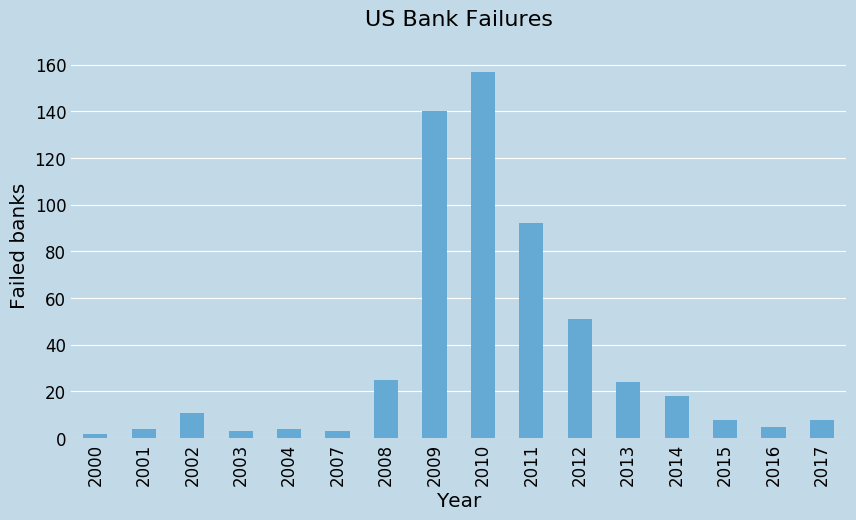

In [26]:
result = df.groupby('year').City.count()
ax = result.plot(kind='bar', figsize=(10, 5), color='#64aad4')

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': '#c2d9e7',
    'font.size': 12.0,
    'axes.facecolor': '#c2d9e7',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': 'white',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#64aad4', '#275876', '#ec866c', '#87d8d6', '#7273a5', '#f9d669']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'legend.loc': 'upper right',
    'legend.fontsize': 'small'
})
ax.set_xlabel("Year")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("US Bank Failures", pad=20)
ax.title.set_fontsize(16)